TASK : HOUSE PRICE PREDICTION

IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv("House_Price.csv")
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [3]:
df.shape

(506, 19)

In [4]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [7]:
df.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [8]:
#Fill the missing values
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [9]:
# drop the unuseful column (bus_ter) as all values are same
del df["bus_ter"]
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,0.039474


In [10]:
# Make the dist1, dist2, dist3, dist4 as single parameter
df["avg_dist"] = (df.dist1+df.dist2+df.dist3+df.dist4)/4

In [11]:
del df["dist1"]
del df["dist2"]
del df["dist3"]
del df["dist4"]

In [12]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.1920,River,23,0.049347,4.0875
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.1728,Lake,42,0.046146,4.9675
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,101.1200,None,38,0.045764,4.9675
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.2672,Lake,45,0.047151,6.0650
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.2896,Lake,55,0.039474,6.0625


In [13]:
#Create dummy variables for categorical variables
df = pd.get_dummies(df)
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,6.0625,1,0,1,0,0,0


In [14]:
# Drop extra columns
del df["airport_NO"]

In [15]:
del df["waterbody_None"]
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,4.0875,1,0,0,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,4.9675,0,1,0,0
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0.045764,4.9675,0,0,0,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,6.0650,1,1,0,0
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,6.0625,0,1,0,0


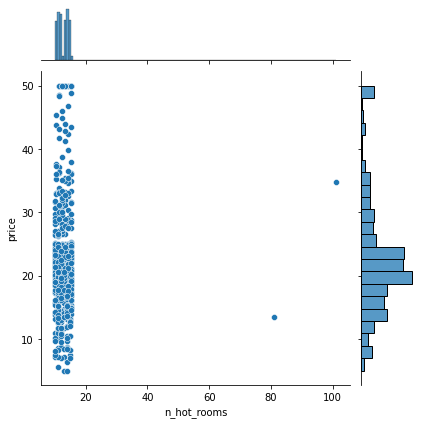

In [16]:
#Plotting graphs
sns.jointplot(x="n_hot_rooms", y="price", data=df)

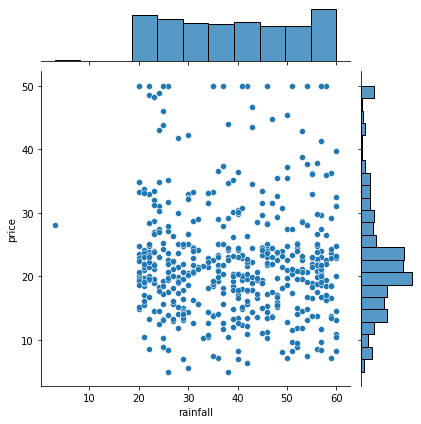

In [16]:
sns.jointplot(x="rainfall", y="price", data=df)

TREATING OUTLIERS

In [17]:
upper_value = np.percentile(df.n_hot_rooms, [99])[0]
upper_value

15.399519999999999

In [18]:
df[(df.n_hot_rooms > upper_value)]

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
2,34.7,0.02729,37.07,0.4690,7.185,61.1,22.2,4.03,7.394,101.12,38,0.045764,4.9675,0,0,0,0
166,50.0,2.01019,49.58,0.6050,7.929,96.2,25.3,3.70,8.300,15.40,37,0.052105,2.0475,1,0,0,1
204,50.0,0.02009,32.68,0.4161,8.034,31.9,25.3,2.88,8.900,15.40,51,0.044178,5.1200,1,0,0,1
267,50.0,0.57834,33.97,0.5750,8.297,67.0,27.0,7.44,8.000,15.40,42,0.063235,2.4200,1,0,0,0
369,50.0,5.66998,48.10,0.6310,6.683,96.8,19.8,3.73,6.700,15.40,58,0.067477,1.3550,1,0,0,1
423,13.4,7.05042,48.10,0.6140,6.103,85.1,19.8,23.29,8.268,81.12,29,0.063344,2.0225,0,1,0,0


In [19]:
df.n_hot_rooms[(df.n_hot_rooms > 3*upper_value)] = 3*upper_value
df[(df.n_hot_rooms > upper_value)]

<ipython-input-19-823ca1a8cf26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms > 3*upper_value)] = 3*upper_value


,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
2,34.7,0.02729,37.07,0.4690,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
166,50.0,2.01019,49.58,0.6050,7.929,96.2,25.3,3.70,8.300,15.40000,37,0.052105,2.0475,1,0,0,1
204,50.0,0.02009,32.68,0.4161,8.034,31.9,25.3,2.88,8.900,15.40000,51,0.044178,5.1200,1,0,0,1
267,50.0,0.57834,33.97,0.5750,8.297,67.0,27.0,7.44,8.000,15.40000,42,0.063235,2.4200,1,0,0,0
369,50.0,5.66998,48.10,0.6310,6.683,96.8,19.8,3.73,6.700,15.40000,58,0.067477,1.3550,1,0,0,1
423,13.4,7.05042,48.10,0.6140,6.103,85.1,19.8,23.29,8.268,46.19856,29,0.063344,2.0225,0,1,0,0


In [20]:
u_value = np.percentile(df.rainfall, [1])[0]
u_value

20.0

In [21]:
df[(df.rainfall < u_value)]

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
213,28.1,0.14052,40.59,0.489,6.375,32.3,21.4,9.38,7.562,10.2248,3,0.044019,3.945,1,0,0,0


In [22]:
df.rainfall[(df.rainfall < 0.3*u_value)] = 0.3*u_value
df[(df.rainfall < u_value)]

<ipython-input-22-bc4421810d84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall < 0.3*u_value)] = 0.3*u_value


,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
213,28.1,0.14052,40.59,0.489,6.375,32.3,21.4,9.38,7.562,10.2248,6,0.044019,3.945,1,0,0,0


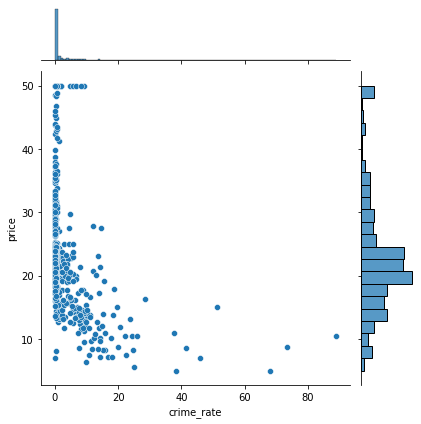

In [23]:
sns.jointplot(x="crime_rate", y="price", data=df)

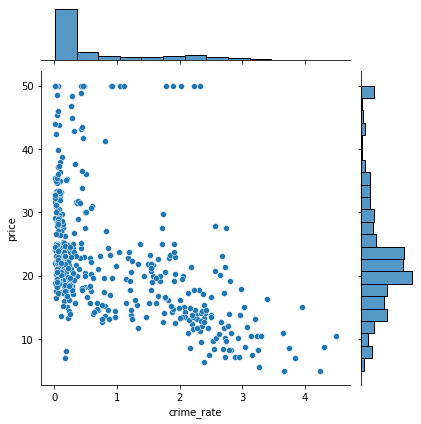

In [28]:
#variable transformation (try to make it linear)
df.crime_rate = np.log(1+df.crime_rate)
sns.jointplot(x="crime_rate", y="price", data=df)

In [24]:
# Coorelation matrix
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.389582,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.389582,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.289946,0.455621,0.017371,0.032927,0.059090,0.383235,-0.379673,-0.086805,-0.016894,-0.018150,-0.037123
resid_area,-0.484754,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.289946,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.455621,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,0.017371,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.017007,0.032927,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096


In [25]:
# as parks has high coorelation with air_qual, it leads to multicollinearity. So, drop the "parks" variable
del df["parks"]
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


MLTIPLE LINEAR REGRESSION

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = df.drop("price", axis =1)
y = df["price"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 15) (102, 15) (404,) (102,)


In [28]:
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)

In [30]:
predicted= pd.DataFrame(data={"Predicted": y_pred, "Actual": y_test})
predicted.head(10)

,Predicted,Actual
463,22.838185,20.2
152,19.540240,15.3
291,32.078652,37.3
183,33.006146,32.5
384,-0.312676,8.8
141,5.210431,14.4
240,27.966559,27.0
349,23.822171,26.6
410,18.547509,15.0
150,20.668782,21.5


In [31]:
lr_score = lr.score(X_test, y_test)
lr_score

0.7661500398986332

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=7)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=7)

In [37]:
y_pred_rf = rf.predict(X_test)

In [40]:
predicted= pd.DataFrame(data={"Predicted": y_pred_rf, "Actual": y_test})
predicted.tail(10)

,Predicted,Actual
381,9.5390,10.9
256,35.5030,44.0
268,38.9315,43.5
425,11.6145,8.3
228,44.7705,46.7
200,33.1280,32.9
12,20.6645,21.7
129,15.3640,14.3
194,29.3695,29.1
320,23.9520,23.8


In [41]:
rf_score = rf.score(X_test, y_test)
rf_score

0.8966933199284931